In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [3]:
# Load dataset
df = pd.read_csv(r'D:\technocolabs\dataset\Life Expectancy Data.csv')
#df.dataframeName = 'Life Expectancy Data.csv'
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
df['Status'] = pd.get_dummies(df['Status'],drop_first=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   uint8  
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

## 1. Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?

In [7]:
corr_matrix = df.corr()
print(corr_matrix["Life expectancy "].sort_values(ascending=False).head(10))

Life expectancy                    1.000000
Schooling                          0.751975
Income composition of resources    0.724776
 BMI                               0.567694
Diphtheria                         0.479495
Polio                              0.465556
GDP                                0.461455
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Name: Life expectancy , dtype: float64


## 2. Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?

In [8]:
data=df[df["Life expectancy "]<65]
print("\n result :-\n",data)


 result :-
           Country  Year  Status  Life expectancy   Adult Mortality  \
1     Afghanistan  2014       1              59.9            271.0   
2     Afghanistan  2013       1              59.9            268.0   
3     Afghanistan  2012       1              59.5            272.0   
4     Afghanistan  2011       1              59.2            275.0   
5     Afghanistan  2010       1              58.8            279.0   
...           ...   ...     ...               ...              ...   
2933     Zimbabwe  2004       1              44.3            723.0   
2934     Zimbabwe  2003       1              44.5            715.0   
2935     Zimbabwe  2002       1              44.8             73.0   
2936     Zimbabwe  2001       1              45.3            686.0   
2937     Zimbabwe  2000       1              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
1                64     0.01               73.523582         62.0  

## 3. How does Infant and Adult mortality rates affect life expectancy?

In [9]:
dlife= df.groupby(["Life expectancy "]).sum()
dlife[['infant deaths','Adult Mortality']]

,infant deaths,Adult Mortality
Life expectancy,,
36.3,23,682.0
39.0,29,533.0
41.0,30,519.0
41.5,30,57.0
42.3,30,496.0
...,...,...
85.0,8,858.0
86.0,17,1093.0
87.0,7,642.0


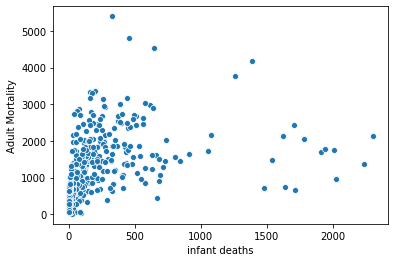

In [10]:
sns.scatterplot(x=dlife['infant deaths'],y=dlife['Adult Mortality'])

## 4. Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.

In [11]:
print(corr_matrix["Life expectancy "].sort_values(ascending=False))

Life expectancy                    1.000000
Schooling                          0.751975
Income composition of resources    0.724776
 BMI                               0.567694
Diphtheria                         0.479495
Polio                              0.465556
GDP                                0.461455
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Total expenditure                  0.218086
Year                               0.170033
Population                        -0.021538
Measles                           -0.157586
infant deaths                     -0.196557
under-five deaths                 -0.222529
 thinness 5-9 years               -0.471584
 thinness  1-19 years             -0.477183
Status                            -0.482136
 HIV/AIDS                         -0.556556
Adult Mortality                   -0.696359
Name: Life expectancy , dtype: float64


Drinking Alcohol = positive


## 5.What is the impact of schooling on the lifespan of humans?

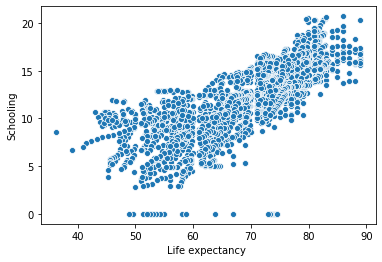

In [12]:
sns.scatterplot(y=df['Schooling'],x=df['Life expectancy '])
plt.show()

## 6. Does Life Expectancy have positive or negative relationship with drinking alcohol?

In [13]:
df['Alcohol'] = df['Alcohol'].fillna(df['Alcohol'].median())
df['Life expectancy '] = df['Life expectancy '].fillna(df['Life expectancy '].median())

In [14]:
from scipy.stats import pearsonr 
list1 = df['Life expectancy '] 
list2 = df['Alcohol'] 
# Apply the pearsonr() 
corr, _ = pearsonr(list1, list2) 
if corr >=0 :
    print(" Life Expectancy have positive relationship with drinking alcohol")
else:
    print("negtive")
print(f'Pearsons correlation: %.3f' % corr) 

 Life Expectancy have positive relationship with drinking alcohol
Pearsons correlation: 0.389


##  7.Do densely populated countries tend to have lower life expectancy?

In [15]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [16]:
dataset2 = df.groupby("Life expectancy ").sum()
dataset2.sort_values("Population", ascending=False ,inplace = True)

In [17]:
dataset2['Population']

Life expectancy 
68.0    1.406223e+09
65.2    1.187550e+09
64.4    1.175479e+09
64.8    1.175103e+09
64.0    1.140232e+09
            ...     
83.7    1.271410e+05
48.3    8.257300e+04
54.2    1.897800e+04
83.1    0.000000e+00
82.9    0.000000e+00
Name: Population, Length: 362, dtype: float64

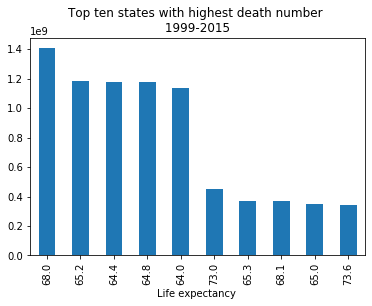

In [18]:
dataset2["Population"].head(10).plot.bar(title= "Top ten states with highest death number \n 1999-2015 ")

##  8.What is the impact of Immunization coverage on life Expectancy?

In [19]:
df['Immunization'] = df["Hepatitis B"] + df["Diphtheria "] + df["Polio"] 

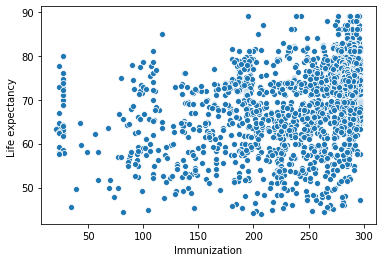

In [20]:
sns.scatterplot(x = df['Immunization'] ,y=df['Life expectancy '])